In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tqdm import tqdm
import pickle
import time 

In [3]:
import os
import cv2
from tqdm import tqdm

# Define your dataset path
src_path = "C:\\Users\\ASUS\\project\\Plant-Leaf-Recognition\\Data"


# List of subdirectories (each representing a class)
subclass = os.listdir(src_path)

# Initialize an empty list for training data
training_data = []


# Add the debugging code to the create_training_data function
def create_training_data():
    for sclass in subclass:
        path = os.path.join(src_path, sclass)
        print("Processing class:", sclass)  # Add this line for debugging
        class_num = subclass.index(sclass)
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (224, 224))
            training_data.append([new_array, class_num])

create_training_data()  # Call the function to trigger data collection
print(len(training_data))


Processing class: leaf1


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:01<00:00, 41.62it/s]


Processing class: leaf10


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:02<00:00, 30.29it/s]


Processing class: leaf11


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 95.28it/s]


Processing class: leaf12


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:01<00:00, 53.81it/s]


Processing class: leaf13


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:01<00:00, 54.92it/s]


Processing class: leaf14


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:01<00:00, 51.14it/s]


Processing class: leaf15


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:01<00:00, 71.92it/s]


Processing class: leaf2


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:03<00:00, 24.12it/s]


Processing class: leaf3


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:01<00:00, 54.58it/s]


Processing class: leaf4


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:01<00:00, 65.52it/s]


Processing class: leaf5


100%|█████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 110.29it/s]


Processing class: leaf6


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:01<00:00, 61.92it/s]


Processing class: leaf7


100%|█████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 134.88it/s]


Processing class: leaf8


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:01<00:00, 55.39it/s]


Processing class: leaf9


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:01<00:00, 41.39it/s]

1125


In [4]:
X = []  # This list will store the features (image data)
y = []  # This list will store the labels (class numbers)

for features, label in training_data:
    X.append(features)
    y.append(label)

# Convert the feature array to a NumPy array and reshape it
X = np.array(X).reshape(-1, 224, 224, 1)

# Print the first sample (feature) in X
print("Sample X:", X[0])


Sample X: [[[246]
  [247]
  [244]
  ...
  [242]
  [243]
  [241]]

 [[247]
  [246]
  [246]
  ...
  [243]
  [242]
  [242]]

 [[246]
  [245]
  [245]
  ...
  [242]
  [238]
  [242]]

 ...

 [[252]
  [253]
  [252]
  ...
  [247]
  [247]
  [247]]

 [[252]
  [253]
  [252]
  ...
  [247]
  [249]
  [247]]

 [[252]
  [253]
  [252]
  ...
  [248]
  [248]
  [246]]]


In [5]:
import pickle

# Save the preprocessed data X using pickle
pickle_out = open("X_Augmented_Grayscale", "wb")
#pickle_out = open("C:\\Users\\ASUS\\project\\Plant-Leaf-Recognition\\X_Augumented_Grayscale", "wb")

pickle.dump(X, pickle_out)
pickle_out.close()



# Save the corresponding labels y using pickle
pickle_out = open("y_Augmented_Grayscale", "wb")
#pickle_out = open("C:\\Users\\ASUS\\project\\Plant-Leaf-Recognition\\y_Augumented_Grayscale", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [8]:
# Model 1
import numpy as np
#pickle_in = open("X_Augumented_Grayscale","rb")
pickle_in=open(r"C:\Users\ASUS\project\Plant-Leaf-Recognition\X_Augmented_Grayscale","rb")
X = pickle.load(pickle_in)

#pickle_in = open("y_Augumented_Grayscale","rb")
pickle_in = open(r"C:\Users\ASUS\project\Plant-Leaf-Recognition\y_Augmented_Grayscale","rb")

y = pickle.load(pickle_in)

#X = X/255.0
X = np.array(X) / 255.0

#X = X.reshape(-1, 128, 128, 1)

model = Sequential()

model.add(Conv2D(100, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard = TensorBoard(log_dir="logs\\{}".format("Basic_CNN_2_Augumented"))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X, y, epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/10
900/900 [==============================] - 124s 137ms/step - loss: 1.4930 - accuracy: 0.5489 - val_loss: 12.9270 - val_accuracy: 0.0000e+00
Epoch 2/10
900/900 [==============================] - 132s 146ms/step - loss: 0.3872 - accuracy: 0.8878 - val_loss: 13.2021 - val_accuracy: 0.0000e+00
Epoch 3/10
900/900 [==============================] - 123s 137ms/step - loss: 0.2345 - accuracy: 0.9444 - val_loss: 22.7848 - val_accuracy: 0.0000e+00
Epoch 4/10
900/900 [==============================] - 142s 158ms/step - loss: 0.0327 - accuracy: 0.9911 - val_loss: 33.3893 - val_accuracy: 0.0000e+00
Epoch 5/10
900/900 [==============================] - 132s 147ms/step - loss: 0.0275 - accuracy: 0.9900 - val_loss: 35.9516 - val_accuracy: 0.0000e+00
Epoch 6/10
900/900 [==============================] - 126s 140ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 40.9277 - val_accuracy: 0.0000e+00
Epoch 7/10
900/900 [==============================] - 125s 138ms/step - loss: 2.9948e-04 - acc

In [9]:
#Model 2
pickle_in = open(r"C:\Users\ASUS\project\Plant-Leaf-Recognition\X_Augmented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open(r"C:\Users\ASUS\project\Plant-Leaf-Recognition\y_Augmented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME="Model_2"

model=Sequential()

model.add(Conv2D(100,(5,5),padding="same",strides=(2,2),activation="relu", input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(5,5),strides=(5,5)))
model.add(Dropout(0.2))
model.add(Conv2D(250,(5,5),padding="same",strides=(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X,y,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])


Epoch 1/10
900/900 [==============================] - 21s 23ms/step - loss: 1.7621 - accuracy: 0.3833 - val_loss: 18.3795 - val_accuracy: 0.0000e+00
Epoch 2/10
900/900 [==============================] - 21s 23ms/step - loss: 0.6599 - accuracy: 0.7589 - val_loss: 21.2789 - val_accuracy: 0.0000e+00
Epoch 3/10
900/900 [==============================] - 21s 23ms/step - loss: 0.4350 - accuracy: 0.8367 - val_loss: 19.3765 - val_accuracy: 0.0000e+00
Epoch 4/10
900/900 [==============================] - 21s 23ms/step - loss: 0.3005 - accuracy: 0.8922 - val_loss: 13.0914 - val_accuracy: 0.0000e+00
Epoch 5/10
900/900 [==============================] - 22s 25ms/step - loss: 0.2744 - accuracy: 0.8989 - val_loss: 20.4341 - val_accuracy: 0.0000e+00
Epoch 6/10
900/900 [==============================] - 22s 25ms/step - loss: 0.2239 - accuracy: 0.9189 - val_loss: 25.9778 - val_accuracy: 0.0000e+00
Epoch 7/10
900/900 [==============================] - 22s 24ms/step - loss: 0.2244 - accuracy: 0.9122 - va

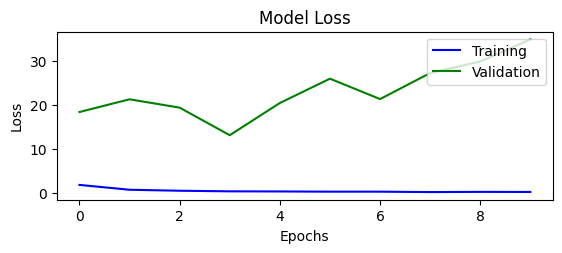

In [10]:
#Plot Model Loss
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='upper right')


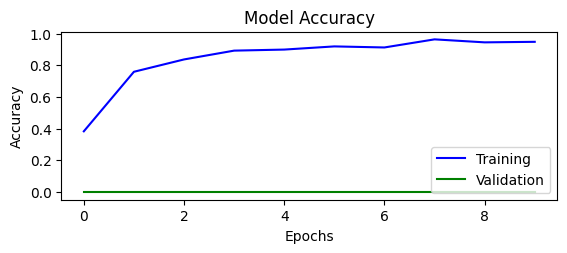

In [11]:
# Plot Accuracy
plt.subplot(211)
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='lower right')

In [12]:
model.save("CNN-model.h5")

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 112, 112, 100)     2600      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 100)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 22, 22, 100)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 250)       625250    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 250)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 250)        

In [14]:
#Model 3
pickle_in = open(r"C:\Users\ASUS\project\Plant-Leaf-Recognition\X_Augmented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open(r"C:\Users\ASUS\project\Plant-Leaf-Recognition\y_Augmented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME="Model_3"

model=Sequential()

model.add(Conv2D(32,(3,3),padding="same",strides=(2,2),activation="relu", input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),padding="same",strides=(1,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),padding="same",strides=(1,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(15,activation='softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X,y,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])
model.summary()

Epoch 1/10
900/900 [==============================] - 23s 25ms/step - loss: 1.4808 - accuracy: 0.4933 - val_loss: 13.0754 - val_accuracy: 0.0000e+00
Epoch 2/10
900/900 [==============================] - 21s 24ms/step - loss: 0.4730 - accuracy: 0.8400 - val_loss: 15.8986 - val_accuracy: 0.0000e+00
Epoch 3/10
900/900 [==============================] - 22s 24ms/step - loss: 0.3441 - accuracy: 0.8844 - val_loss: 16.8281 - val_accuracy: 0.0000e+00
Epoch 4/10
900/900 [==============================] - 22s 24ms/step - loss: 0.2540 - accuracy: 0.9156 - val_loss: 15.5478 - val_accuracy: 0.0000e+00
Epoch 5/10
900/900 [==============================] - 22s 24ms/step - loss: 0.1967 - accuracy: 0.9333 - val_loss: 15.8403 - val_accuracy: 0.0000e+00
Epoch 6/10
900/900 [==============================] - 22s 24ms/step - loss: 0.2028 - accuracy: 0.9300 - val_loss: 17.7414 - val_accuracy: 0.0000e+00
Epoch 7/10
900/900 [==============================] - 21s 24ms/step - loss: 0.1340 - accuracy: 0.9556 - va

In [15]:
#Testing predictions on model
from tensorflow.keras.preprocessing import image

def prediction(img):
    img = image.img_to_array(img)
    img = img.reshape(-1, 224, 224, 1)
    img = img.astype('float32')
    img = img/255.0
    
    return np.argmax(model.predict(img),axis=-1)[0]
    
labels=["Ulmus carpinifolia","Acer","Salix aurita","Quercus","Alnus incana","Betula pubescens","Salix alba 'Sericea", "Populus tremula","Ulmus glabra","Sorbus aucuparia","Salix sinerea","Populus","Tilia","Sorbus intermedia","Fagus silvatica"]
path = "C:\\Users\\ASUS\\project\\Plant-Leaf-Recognition\\sample\\populs.tif"

img = image.load_img(path,target_size=(224,224),grayscale=True)
print(labels[prediction(img)])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 148ms/step
Alnus incana


In [16]:
#Model 4- ALEXNET 
pickle_in = open(r"C:\Users\ASUS\project\Plant-Leaf-Recognition\X_Augmented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open(r"C:\Users\ASUS\project\Plant-Leaf-Recognition\y_Augmented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME = "AlexNet_Model"

model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(filters=256, input_shape=X.shape[1:], kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=384,kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
          

model.add(Flatten())
model.add(Dense(15))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X,y, epochs=5, batch_size=5, validation_split=0.2, callbacks=[tensorboard])
model.summary()

Epoch 1/5
180/180 [==============================] - 135s 741ms/step - loss: 2.5679 - accuracy: 0.0622 - val_loss: 5.3994 - val_accuracy: 0.0000e+00
Epoch 2/5
180/180 [==============================] - 134s 747ms/step - loss: 2.5051 - accuracy: 0.0844 - val_loss: 6.5964 - val_accuracy: 0.0000e+00
Epoch 3/5
180/180 [==============================] - 5732s 32s/step - loss: 2.5083 - accuracy: 0.0767 - val_loss: 6.9792 - val_accuracy: 0.0000e+00
Epoch 4/5
180/180 [==============================] - 152s 847ms/step - loss: 2.5061 - accuracy: 0.0822 - val_loss: 6.8277 - val_accuracy: 0.0000e+00
Epoch 5/5
180/180 [==============================] - 139s 769ms/step - loss: 2.4998 - accuracy: 0.0589 - val_loss: 7.2639 - val_accuracy: 0.0000e+00
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (5, 214, 214, 96)         11712     
                                    